## Question 2

### Logistic Regression : Heart Disease Prediction using Logistic Regression (on a given dataset)

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Loading the dataset

In [3]:
df = pd.read_csv('framingham.csv')
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


## Visualizing/Analyzing the data

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

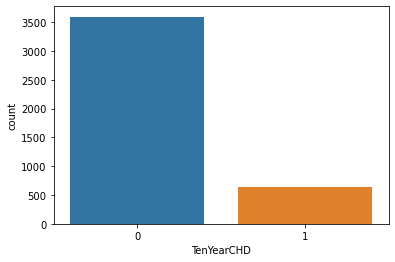

In [4]:
sns.countplot(x='TenYearCHD', data=df)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

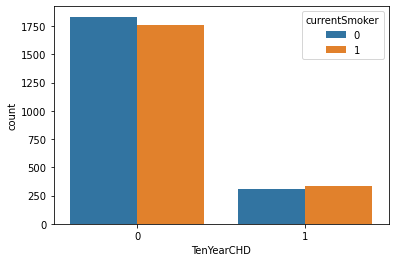

In [5]:
sns.countplot(x='TenYearCHD', hue='currentSmoker', data=df)

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

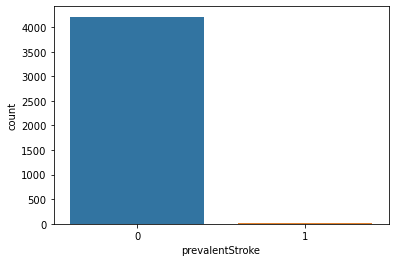

In [6]:
sns.countplot(x='prevalentStroke', data=df)

<AxesSubplot:xlabel='prevalentHyp', ylabel='count'>

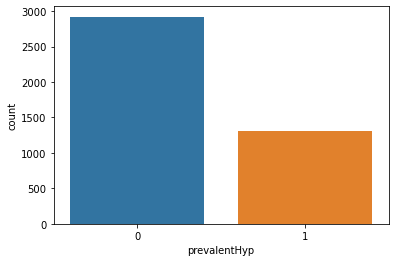

In [7]:
sns.countplot(x='prevalentHyp', data=df)

<AxesSubplot:ylabel='Frequency'>

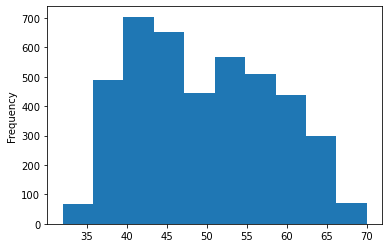

In [8]:
df['age'].plot.hist()

## Cleaning the data

In [9]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

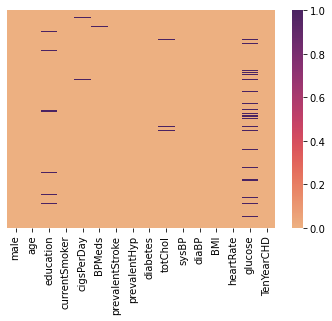

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='flare')

## Dropping the unnecessary columns

In [11]:
df.drop('education', axis=1, inplace=True)
df.head(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
df.drop('currentSmoker', axis=1, inplace=True)
df.head(5)

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Replacing the null values

In [13]:
print("Mean of the columns having null values:")
print(f"cigsPerDay: {df['cigsPerDay'].mean()}")
print(f"totChol: {df['totChol'].mean()}")
print(f"glucose: {df['glucose'].mean()}")
print(f"BMI: {df['BMI'].mean()}")
print(f"heartRate: {df['heartRate'].mean()}")

Mean of the columns having null values:
cigsPerDay: 9.003088619624615
totChol: 236.72158548233045
glucose: 81.96675324675324
BMI: 25.80200758473571
heartRate: 75.87892376681614


In [14]:
df['cigsPerDay'].replace(np.nan, value=9, inplace=True)
df['totChol'].replace(np.nan, value=236, inplace=True)
df['glucose'].replace(np.nan, value=81, inplace=True)
df['BMI'].replace(np.nan, value=25, inplace=True)
df['heartRate'].replace(np.nan, value=75, inplace=True)

In [15]:
df.isnull().sum()

male                0
age                 0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

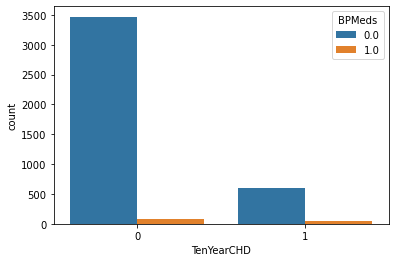

In [16]:
sns.countplot(x='TenYearCHD', hue='BPMeds', data=df)

In [17]:
df.drop('BPMeds', axis=1, inplace=True)
df.head(5)

,male,age,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [18]:
df.isnull().sum()

male               0
age                0
cigsPerDay         0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Training the model

In [19]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
logmodel = LogisticRegression(max_iter=1000)

In [23]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Evaluating the model

In [24]:
predictions = logmodel.predict(X_test)

## Accuracy and confusion matrix of the model

In [25]:
accuracy_score(y_test, predictions)

0.85062893081761

In [26]:
confusion_matrix(y_test, predictions)

array([[1067,    7],
       [ 183,   15]], dtype=int64)

## Model's report

In [27]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.85      0.99      0.92      1074\n           1       0.68      0.08      0.14       198\n\n    accuracy                           0.85      1272\n   macro avg       0.77      0.53      0.53      1272\nweighted avg       0.83      0.85      0.80      1272\n'

## Example (Prediction)

In [28]:
print(X_test.loc[1])

male                 0.00
age                 46.00
cigsPerDay           0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            250.00
sysBP              121.00
diaBP               81.00
BMI                 28.73
heartRate           95.00
glucose             76.00
Name: 1, dtype: float64


In [29]:
test = np.array(X_test.loc[1])
result = logmodel.predict(test.reshape(1, -1))

C:\Users\Shiva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [30]:
if result[0] == 1:
    print("Yes, the patient has a Heart Disease!")
elif result[0] == 0:
    print("No, the patient doesnt have a Heart Disease!")

No, the patient doesnt have a Heart Disease!
